<a href="https://colab.research.google.com/github/saisrikanthrayavarapu/PySpark/blob/master/PySpark_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objectives of the Case Study<br>
Primarily, this case study is meant as a deep dive into the usage of Spark. As you saw while working with Spark, its syntax behaves differently from a regular Python syntax. One of the major objectives of this case study is to gain familiarity with how analysis works in PySpark as opposed to base Python.<br>

The process of running a model-building command boils down to a few lines of code. While drawing inferences from data, the most time-consuming step is preparing the data up to the point of model building. So, this case study will focus more on exploratory analysis.

In [1]:
!pip install pyspark -q
!pip install kaggle -q

     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 66.9 MB/s 


In [2]:
# Importing spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder \
            .appName("EDA") \
            .getOrCreate()

In [3]:
# Auto auth is not implemented, authorize google drive manually for execution

# mounting Google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir ~/.kaggle # create root folder for copying input file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!mkdir '/content/NYC_Parking_Tickets' # creating a new directory that serves as root
!kaggle datasets download -d new-york-city/nyc-parking-tickets -f Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv
# downloading the data set (CSV format) in the session

 95% 337M/356M [00:12<00:00, 31.3MB/s]
100% 356M/356M [00:12<00:00, 30.4MB/s]


In [6]:
# unzipping the file in the created directory
!unzip -q "/content/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv.zip" -d "/content/NYC_Parking_Tickets"
# Removing the downloaded zip file from session storage
!rm /content/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv.zip

In [7]:
# Loading the data
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/NYC_Parking_Tickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv')

In [8]:
# having a look at the data of first 10 rows
df.show(10)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+--------------------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+----+----+----+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code

In [9]:
# Viewing all the columns of the data set
df.columns

['Summons Number',
 'Plate ID',
 'Registration State',
 'Plate Type',
 'Issue Date',
 'Violation Code',
 'Vehicle Body Type',
 'Vehicle Make',
 'Issuing Agency',
 'Street Code1',
 'Street Code2',
 'Street Code3',
 'Vehicle Expiration Date',
 'Violation Location',
 'Violation Precinct',
 'Issuer Precinct',
 'Issuer Code',
 'Issuer Command',
 'Issuer Squad',
 'Violation Time',
 'Time First Observed',
 'Violation County',
 'Violation In Front Of Or Opposite',
 'House Number',
 'Street Name',
 'Intersecting Street',
 'Date First Observed',
 'Law Section',
 'Sub Division',
 'Violation Legal Code',
 'Days Parking In Effect    ',
 'From Hours In Effect',
 'To Hours In Effect',
 'Vehicle Color',
 'Unregistered Vehicle?',
 'Vehicle Year',
 'Meter Number',
 'Feet From Curb',
 'Violation Post Code',
 'Violation Description',
 'No Standing or Stopping Violation',
 'Hydrant Violation',
 'Double Parking Violation',
 'Latitude',
 'Longitude',
 'Community Board',
 'Community Council ',
 'Census Tract'

In [10]:
# number of columns
len(df.columns)

51

In [11]:
# Looking at the number of enteries in the data
df.count()

9100278

In [12]:
# Looking foir the type of the columns
df.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation Coun

In [13]:
# verify schema types
df.schema

StructType([StructField('Summons Number', LongType(), True), StructField('Plate ID', StringType(), True), StructField('Registration State', StringType(), True), StructField('Plate Type', StringType(), True), StructField('Issue Date', StringType(), True), StructField('Violation Code', IntegerType(), True), StructField('Vehicle Body Type', StringType(), True), StructField('Vehicle Make', StringType(), True), StructField('Issuing Agency', StringType(), True), StructField('Street Code1', IntegerType(), True), StructField('Street Code2', IntegerType(), True), StructField('Street Code3', IntegerType(), True), StructField('Vehicle Expiration Date', IntegerType(), True), StructField('Violation Location', IntegerType(), True), StructField('Violation Precinct', IntegerType(), True), StructField('Issuer Precinct', IntegerType(), True), StructField('Issuer Code', IntegerType(), True), StructField('Issuer Command', StringType(), True), StructField('Issuer Squad', StringType(), True), StructField('V

In [14]:
# Droping duplicates, hence cleaning data
nyc = df.dropDuplicates()
nyc.count()

9100278

In [15]:
# Description of Summons Number Column
nyc.describe("Summons Number").show()

+-------+-------------------+
|summary|     Summons Number|
+-------+-------------------+
|  count|            9100278|
|   mean|6.486507134673545E9|
| stddev|2.166447421200202E9|
|    min|         1001793950|
|    max|         8006150291|
+-------+-------------------+



In [16]:
# Description of Plate ID Column
nyc.describe("Plate ID").show()

+-------+--------+
|summary|Plate ID|
+-------+--------+
|  count| 9100276|
|   mean|     NaN|
| stddev|     NaN|
|    min|       !|
|    max|       ]|
+-------+--------+



In [17]:
# Description of Registration State Column
nyc.describe("Registration State").show()

+-------+--------------------+
|summary|  Registration State|
+-------+--------------------+
|  count|             9100278|
|   mean|                99.0|
| stddev|1.320014773417410...|
|    min|                  99|
|    max|                  YT|
+-------+--------------------+



In [18]:
# Description of Violation Code Column
nyc.describe("Violation Code").show()

+-------+------------------+
|summary|    Violation Code|
+-------+------------------+
|  count|           9100278|
|   mean| 35.25493495912982|
| stddev|20.505475119322274|
|    min|                 0|
|    max|                99|
+-------+------------------+



In [19]:
# Description of Vehicle Body Type Column
nyc.describe("Vehicle Body Type").show()

+-------+-----------------+
|summary|Vehicle Body Type|
+-------+-----------------+
|  count|          8989410|
|   mean|5.256613226452906|
| stddev|23.12769445663689|
|    min|                -|
|    max|              ZSR|
+-------+-----------------+



In [20]:
# Description of Vehicle Make Column
nyc.describe("Vehicle Make").show()

+-------+------------------+
|summary|      Vehicle Make|
+-------+------------------+
|  count|           9037103|
|   mean| 4555.626865671642|
| stddev|12905.597273858537|
|    min|             (UPS)|
|    max|                 `|
+-------+------------------+



In [21]:
# Description of Violation Precinct Column
nyc.describe("Violation Precinct").show()

+-------+------------------+
|summary|Violation Precinct|
+-------+------------------+
|  count|           9100278|
|   mean| 50.57299985780654|
| stddev|39.881921447679915|
|    min|                 0|
|    max|               994|
+-------+------------------+



In [22]:
# Description of Issuer Precinct Column
nyc.describe("Issuer Precinct").show()

+-------+-----------------+
|summary|  Issuer Precinct|
+-------+-----------------+
|  count|          9100278|
|   mean|56.58895640330988|
| stddev| 66.6537514625166|
|    min|                0|
|    max|              997|
+-------+-----------------+



In [23]:
# Description of Violation Time Column
nyc.describe("Violation Time").show()

+-------+-----------------+
|summary|   Violation Time|
+-------+-----------------+
|  count|          9098204|
|   mean|766.5333333333333|
| stddev|395.3869473000318|
|    min|            +000A|
|    max|            8741P|
+-------+-----------------+



In [24]:
nyc.createOrReplaceTempView("df_table")

In [25]:
nyc.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation Coun

In [26]:
# Looking for null values
null = spark.sql("select count(*) from df_table where `Summons Number` is null or `Plate ID` is null or `Registration State` is null or `Issue Date` is null or `Violation Code` is null or `Vehicle Body Type` is null or `Vehicle Make` is null or `Violation Precinct` is null or `Issuer Precinct` is null or `Violation Time` is null")
null.show()

+--------+
|count(1)|
+--------+
|  166204|
+--------+



In [35]:
nyc = spark.sql("select * from df_table where year(TO_DATE(CAST(UNIX_TIMESTAMP(`Issue Date`,'MM/dd/yyyy') AS TIMESTAMP))) = 2013")
nyc.count()

4379109

In [28]:
# Importing Visualization Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [36]:
nyc.createOrReplaceTempView("nyc_table")
df = spark.sql(
    "SELECT \
    `Summons Number` as `summons_number`, \
    `Plate ID` as `plate_id`, \
    `Registration State` as `registration_state`, \
    `Issue Date` as `issue_date`, \
    `Violation Code` as `violation_code`, \
    `Vehicle Body Type` as `vehicle_body_type`, \
    `Vehicle Make` as `vehicle_make`, \
    `Violation Precinct` as `violation_precinct`, \
    `Issuer Precinct` as `issuer_precinct`, \
    `Violation Time` as `violation_time` \
    FROM nyc_table")
df.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|summons_number|plate_id|registration_state|issue_date|violation_code|vehicle_body_type|vehicle_make|violation_precinct|issuer_precinct|violation_time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    1350017498| GHM8497|                NY|07/23/2013|            71|              SDN|       HYUND|               113|              0|         0320P|
|    1351593298| MXX7587|                PA|07/27/2013|            24|              SDN|       CHRYS|                77|              0|         0403P|
|    1351593754| HWE8254|                PA|07/26/2013|            24|              SDN|       NISSA|                73|              0|         1204P|
|    1338182160|  XX712Y|                NJ|07/31/2013|            46|             DELV|

In [37]:
df.createOrReplaceTempView("nyc_table")

In [38]:
Distribution= spark.sql("SELECT year(issue_date) as year,month(issue_date) as month,count(*) as Ticket_Frequency FROM nyc_table GROUP BY year(issue_date),month(issue_date) order by Ticket_Frequency desc")
Distribution.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|null| null|         4379109|
+----+-----+----------------+



<Figure size 432x288 with 0 Axes>

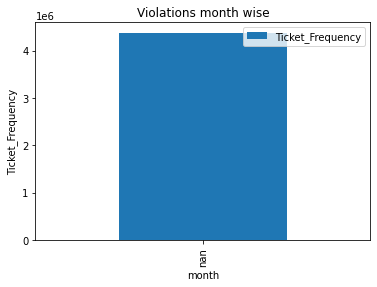

In [39]:
Number_of_Violations = Distribution.toPandas()
plt.clf()
Number_of_Violations.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Violations month wise")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()

In [40]:
Plate_Id=spark.sql("Select plate_id, count(*) as Ticket_Frequency from nyc_table group by plate_id having count(*)>=100 order by Ticket_Frequency desc")
Plate_Id.show()

+----------+----------------+
|  plate_id|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            7566|
|       N/A|            2127|
|   49839JG|             597|
|    AG293U|             529|
|   62901JM|             521|
|   62627JM|             502|
|   47603MD|             455|
|    AM471N|             438|
|   62546JM|             434|
|    AJ495X|             432|
|   75225JW|             430|
|   49781MA|             426|
|   30412MD|             422|
|   63485JM|             421|
|   68092JZ|             420|
|   16208TC|             411|
|   17442JE|             406|
|   17744MD|             398|
|   42909JM|             395|
|   95140JC|             392|
+----------+----------------+
only showing top 20 rows



<Figure size 432x288 with 0 Axes>

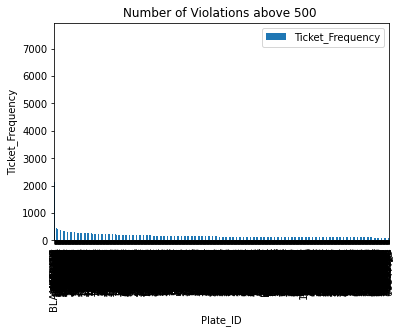

In [41]:
Number_of_Violations_By_PlateID=Plate_Id.toPandas()
plt.clf()
Number_of_Violations_By_PlateID.plot(x= 'plate_id', y='Ticket_Frequency', kind='bar')
plt.title("Number of Violations above 100 ")
plt.xlabel('Plate_ID')
plt.ylabel('Ticket_Frequency')
plt.show()

In [42]:
q2=spark.sql("SELECT registration_state, Count(*) as Ticket_Frequency from nyc_table group by registration_state order by Ticket_Frequency desc")
q2.count()

68

<Figure size 7200x14400 with 0 Axes>

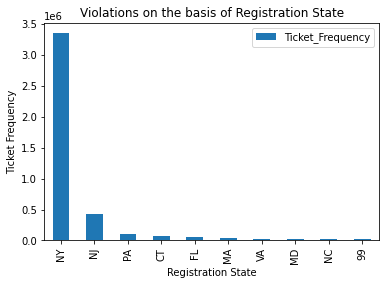

In [43]:
q2_for_plot = q2.toPandas()
plt.figure(figsize=(100,200))
q2_for_plot.head(10).plot(x='registration_state', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Registration State")
plt.xlabel('Registration State')
plt.ylabel('Ticket Frequency')
plt.show()

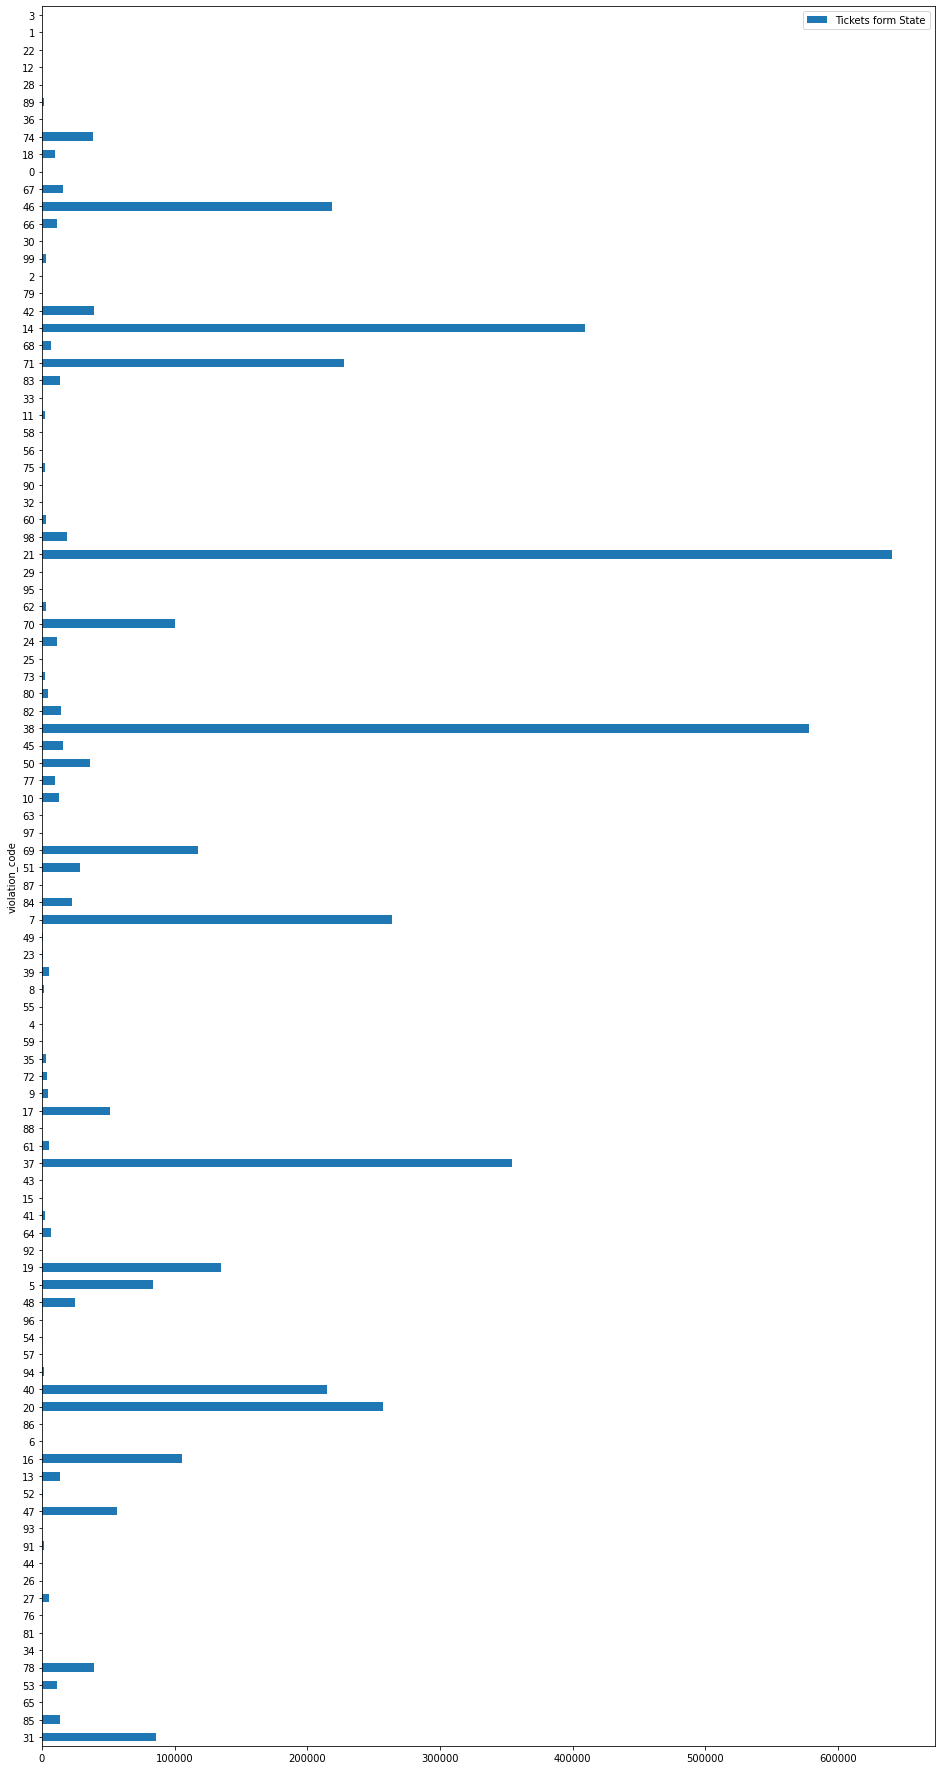

In [44]:
tickets = spark.sql("SELECT `violation_code`, count(*) as `Tickets form State` FROM nyc_table GROUP BY `violation_code`")
plotdata = tickets.toPandas().set_index('violation_code').plot.barh(figsize=(16, 32))

### Examine the data

#### 1. Find the total number of tickets for the year.

In [45]:
spark.sql("select count(*) as `total number of tickets for the year`\
          from nyc_table").show()

+------------------------------------+
|total number of tickets for the year|
+------------------------------------+
|                             4379109|
+------------------------------------+



#### 2. Find out the number of unique states from where the cars that got parking tickets came.

In [46]:
spark.sql("select count(distinct `registration_state`) as `Registration State`\
          from nyc_table").show()

+------------------+
|Registration State|
+------------------+
|                68|
+------------------+



### Aggregation tasks

#### 1. How often does each violation code occur?

In [47]:
spark.sql("select `violation_code`, count(*) as `Number of tickets for the violation code`\
          from nyc_table\
          group by `violation_code`\
          order by `Number of tickets for the violation code` desc limit 5").show()

+--------------+----------------------------------------+
|violation_code|Number of tickets for the violation code|
+--------------+----------------------------------------+
|            21|                                  640686|
|            38|                                  577796|
|            14|                                  409225|
|            37|                                  354456|
|             7|                                  263455|
+--------------+----------------------------------------+



#### 2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [48]:
spark.sql("select `vehicle_body_type`, count(*) as `Number of tickets for the vehicle body type`\
          from nyc_table\
          group by `vehicle_body_type`\
          order by `Number of tickets for the vehicle body type` desc\
          limit 5").show()

+-----------------+-------------------------------------------+
|vehicle_body_type|Number of tickets for the vehicle body type|
+-----------------+-------------------------------------------+
|             SUBN|                                    1337137|
|             4DSD|                                    1212518|
|              VAN|                                     639710|
|             DELV|                                     337916|
|              SDN|                                     228046|
+-----------------+-------------------------------------------+



In [49]:
spark.sql("select `vehicle_make`, count(*) as `Number of tickets for the vehicle make`\
          from nyc_table\
          group by `vehicle_make`\
          order by `Number of tickets for the vehicle make` desc\
          limit 5").show()

+------------+--------------------------------------+
|vehicle_make|Number of tickets for the vehicle make|
+------------+--------------------------------------+
|        FORD|                                598823|
|       TOYOT|                                427072|
|       HONDA|                                391529|
|       CHEVR|                                356989|
|       NISSA|                                313727|
+------------+--------------------------------------+



#### 3. A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:

- 'Violation Precinct' (This is the precinct of the zone where the violation occurred). Using this, can you draw any insights for parking violations in any specific areas of the city? 

In [50]:
# Taking 6 since the first one is not valid
spark.sql("select `violation_precinct`, count(*) as `Number of tickets for the violation precinct`\
          from nyc_table\
          group by `violation_precinct`\
          order by `Number of tickets for the violation precinct` desc\
          limit 6").show()

+------------------+--------------------------------------------+
|violation_precinct|Number of tickets for the violation precinct|
+------------------+--------------------------------------------+
|                 0|                                      355335|
|                19|                                      237848|
|                18|                                      222726|
|                14|                                      170418|
|                 1|                                      127120|
|                17|                                      126616|
+------------------+--------------------------------------------+



- 'Issuer Precinct' (This is the precinct that issued the ticket.)

In [51]:
# Taking 6 since the first one is not valid
spark.sql("select `issuer_precinct`, count(*) as `Number of tickets for the issuer precinct`\
          from nyc_table\
          group by `issuer_precinct`\
          order by `Number of tickets for the issuer precinct` desc\
          limit 6").show()

+---------------+-----------------------------------------+
|issuer_precinct|Number of tickets for the issuer precinct|
+---------------+-----------------------------------------+
|              0|                                   423454|
|             19|                                   226949|
|             18|                                   213790|
|             14|                                   160934|
|              1|                                   122577|
|             17|                                   120751|
+---------------+-----------------------------------------+



Precinct 19, 14, 1, 18 and 114 are common in both above query.
There are many violations in precinct 19.

#### 4. Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 

In [52]:
spark.sql("select `violation_code`, count(*) as `Issuer precinct = 19`\
          from nyc_table\
          where `issuer_precinct` = 19\
          group by `violation_code`\
          order by `Issuer precinct = 19` desc\
          LIMIT 10").show()

+--------------+--------------------+
|violation_code|Issuer precinct = 19|
+--------------+--------------------+
|            38|               38984|
|            37|               37348|
|            21|               25894|
|            14|               25880|
|            16|               21219|
|            20|               14418|
|            40|               13510|
|            46|                9007|
|            19|                6583|
|            71|                6571|
+--------------+--------------------+



In [53]:
spark.sql("select `violation_code`, count(*) as `Issuer precinct = 14`\
          from nyc_table\
          where `issuer_precinct` = 14\
          group by `violation_code`\
          order by `Issuer precinct = 14` desc\
          LIMIT 10").show()

+--------------+--------------------+
|violation_code|Issuer precinct = 14|
+--------------+--------------------+
|            69|               37755|
|            14|               32089|
|            31|               22089|
|            42|               13244|
|            47|               10660|
|            17|                3927|
|            46|                3712|
|            19|                3165|
|            38|                3156|
|            84|                2996|
+--------------+--------------------+



In [54]:
spark.sql("select `violation_code`, count(*) as `Issuer precinct = 1`\
          from nyc_table\
          where `issuer_precinct` = 1\
          group by `violation_code`\
          order by `Issuer precinct = 1` desc\
          LIMIT 10").show()

+--------------+-------------------+
|violation_code|Issuer precinct = 1|
+--------------+-------------------+
|            14|              31745|
|            16|              20943|
|            20|              11193|
|            38|               7577|
|            17|               6684|
|            69|               5320|
|            37|               5240|
|            46|               4192|
|            21|               3897|
|            19|               3713|
+--------------+-------------------+



There are violation codes having higher overall higher frequency

#### 5. Find out the properties of parking violations across different times of the day:

- Find a way to deal with missing values, if any.

In [55]:
null = spark.sql("select count(*) as `Total null values` from df_table where `Summons Number` is null or `Plate ID` is null or `Registration State` is null or `Issue Date` is null or `Violation Code` is null or `Vehicle Body Type` is null or `Vehicle Make` is null or `Violation Precinct` is null or `Issuer Precinct` is null or `Violation Time` is null")
null.show()

+-----------------+
|Total null values|
+-----------------+
|           166204|
+-----------------+



There are no null values

- The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

In [56]:
from pyspark.sql.functions import col, regexp_replace, udf, date_format

In [57]:
df.select("violation_time", col("violation_time").rlike("^[01][0-9]{3}[AP]$").alias("criteria")).where(col("criteria")=="false").show()
df.select("violation_time", col("violation_time").rlike("^[01][0-9]{3}[AP]$").alias("criteria")).where(col("criteria")=="false").count()

+--------------+--------+
|violation_time|criteria|
+--------------+--------+
|         09+4A|   false|
|         4400P|   false|
|         7756P|   false|
|         2805P|   false|
|         8445P|   false|
|         2906P|   false|
|         092/A|   false|
|         5315P|   false|
|         5402P|   false|
|         5913P|   false|
|         8400P|   false|
|         2957P|   false|
|         .633P|   false|
|         2045P|   false|
|         8545P|   false|
|         3244P|   false|
|         3002P|   false|
|         2825P|   false|
|         2838P|   false|
|         4715P|   false|
+--------------+--------+
only showing top 20 rows



130

In [58]:
new_df = df.withColumn('violation_time', regexp_replace('violation_time', '^.*[^0-9AP].*$', '0000A'))
new_df = new_df.withColumn('violation_time', regexp_replace('violation_time', '^.*[^AP]$', '0000A'))
new_df = new_df.withColumn('violation_time', regexp_replace('violation_time', '^[^01].*$', '0000A'))
new_df = new_df.withColumn('violation_time', regexp_replace('violation_time', '^[0-9AP]{1,4}$', '0000A'))

In [61]:
new_df.select("violation_time", col("violation_time").rlike("^[01][0-9]{3}[P]$").alias("criteria")).where(col("criteria")=="false").show()
print("Initially 0000A count: ",df.select("violation_time").where(col("violation_time")=="0000A").count())
print("Finally 0000A count: ", new_df.select("violation_time").where(col("violation_time")=="0000A").count())

+--------------+--------+
|violation_time|criteria|
+--------------+--------+
|         0805A|   false|
|         0946A|   false|
|         0947A|   false|
|         1010A|   false|
|         1158A|   false|
|         0819A|   false|
|         0820A|   false|
|         0925A|   false|
|         1139A|   false|
|         0840A|   false|
|         0845A|   false|
|         1146A|   false|
|         0747A|   false|
|         0830A|   false|
|         0840A|   false|
|         0854A|   false|
|         0915A|   false|
|         1108A|   false|
|         1120A|   false|
|         1148A|   false|
+--------------+--------+
only showing top 20 rows

Initially 0000A count:  614
Finally 0000A count:  744


In [64]:
maketime_udf_str_1 = udf(lambda x: x[0:2]+':'+x[2:4]+':00' if x[-1]=="A" or int(x[0:2]) in range(13,25) else str(int(x[0:2])+12)+':'+x[2:4]+':00')

maketime_udf_str_2 = udf(lambda x: '00'+x[2:] if x[0:2]=="24" else x)
new_df = new_df.withColumn('violation_time_new', maketime_udf_str_1('violation_time'))
new_df = new_df.withColumn('violation_time_new', maketime_udf_str_2('violation_time_new'))
new_df = new_df.withColumn('violation_time_new_formatted', date_format('violation_time_new', 'H:m:s'))

new_df.printSchema()

root
 |-- summons_number: long (nullable = true)
 |-- plate_id: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- issue_date: string (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- vehicle_body_type: string (nullable = true)
 |-- vehicle_make: string (nullable = true)
 |-- violation_precinct: integer (nullable = true)
 |-- issuer_precinct: integer (nullable = true)
 |-- violation_time: string (nullable = true)
 |-- violation_time_new: string (nullable = true)
 |-- violation_time_new_formatted: string (nullable = true)



In [65]:
new_df.createOrReplaceTempView("bins_table")

In [66]:
spark.sql("select violation_code, violation_time_new_formatted, count(*) count from bins_table group by violation_code, violation_time_new_formatted").show()

PythonException: ignored

In [ ]:
result = spark.sql(
    'SELECT `violation_code`, count(*) as `number of tickets for the time bin for violation code`, \
    CASE \
    WHEN HOUR(`violation_time_new_formatted`) IN ("0","1","2","3") THEN "1" \
    WHEN HOUR(`violation_time_new_formatted`) IN ("4","5","6","7") THEN "2" \
    WHEN HOUR(`violation_time_new_formatted`) IN ("8","9","10","11") THEN "3" \
    WHEN HOUR(`violation_time_new_formatted`) IN ("12","13","14","15") THEN "4" \
    WHEN HOUR(`violation_time_new_formatted`) IN ("16","17","18","19") THEN "5" \
    WHEN HOUR(`violation_time_new_formatted`) IN ("20","21","22","23") THEN "6" \
    END AS `violation_time_bin` \
    FROM bins_table \
    GROUP BY `violation_time_bin`,`violation_code`')
result.show()

In [ ]:
result.createOrReplaceTempView("bins_table")

In [ ]:
bin_1 = spark.sql("select violation_code from bins_table where violation_time_bin == 1 group by violation_code order by count(*) desc")
bin_1.show(3)

In [ ]:
bin_2 = spark.sql("select violation_code from bins_table where violation_time_bin == 2 group by violation_code order by count(*) desc")
bin_2.show(3)

In [ ]:
bin_3 = spark.sql("select violation_code from bins_table where violation_time_bin == 3 group by violation_code order by count(*) desc")
bin_3.show(3)

In [ ]:
bin_4 = spark.sql("select violation_code from bins_table where violation_time_bin == 4 group by violation_code order by count(*) desc")
bin_4.show(3)

In [ ]:
bin_5 = spark.sql("select violation_code from bins_table where violation_time_bin == 5 group by violation_code order by count(*) desc")
bin_5.show(3)

In [ ]:
bin_6 = spark.sql("select violation_code from bins_table where violation_time_bin == 6 group by violation_code order by count(*) desc")
bin_6.show(3)

- For the three most commonly occurring violation codes, find the most common time of the day 

In [ ]:
spark.sql("select violation_time_bin from bins_table group by violation_time_bin order by count(*) desc").show(3)

#### 6. Find some seasonality in this data:

- First, divide the year into a certain number of seasons, and find the frequencies of tickets for each season.

In [ ]:
        # spring    March, April, May
         #summer    June, July, August
         #autumn    September, October, November
         #winter    December, January, February

In [ ]:
seasonality = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from nyc_table")
seasonality.show()

In [ ]:
seasonality.createOrReplaceTempView("seasonality_table")

In [ ]:
seasonality_frequency = spark.sql("select season, count(*) as no_of_tickets from seasonality_table group by season order by no_of_tickets desc")
seasonality_frequency.show()

- Find the three most common violations for each of these seasons.

In [ ]:
# Spring season
spring = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where season = 'spring' group by Violation_Code order by Frequency desc" )
spring.show(3)

In [ ]:
# Winter season
winter = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where season = 'winter' group by Violation_Code order by Frequency desc" )
winter.show(3)

In [ ]:
#  Summer season
summer = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where season = 'summer' group by Violation_Code order by Frequency desc" )
summer.show(3)

In [ ]:
#  Autumn season
autumn = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where season = 'autumn' group by Violation_Code order by Frequency desc" )
autumn.show(3)

#### 7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes

In [ ]:
common_violation = spark.sql("select violation_code, count(*) as frequency from nyc_table  group by violation_code order by frequency desc")
common_violation.show(3)

- Find the total amount collected for the three violation codes with the maximum tickets. State the code that has the highest total collection.

In [ ]:
from pyspark.sql.functions import when
common_violation_fine=common_violation.withColumn("fine",when(common_violation.violation_code == 21, (common_violation.frequency) *55).otherwise((common_violation.frequency)*50))
common_violation_fine.show(3)
print('total collection = ',767740*55+662765*50+541526*50)

Code with 21 had the highest collection.

- What can you intuitively infer from these findings?

In [ ]:
# 1. posted speed limit criteria is violated the most
# 2. Jan to June - major violation
# 3. Highest violation : code 21

In [67]:
spark.stop()